# Iris Dataset

In [2]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
#print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
#df_iris.columns#['label_names'].unique()

In [3]:
from ML_KNN_manual import train_test_split_df

train_df, test_df = train_test_split_df(df_iris,0.85)

X_train = train_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_train = train_df['label_names']
X_test = test_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y_test = test_df['label_names']

names_dict = dict(zip(df_iris['label'].unique(), df_iris['label_names'].unique()))
print (names_dict)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [4]:
from ML_KNN_manual import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [6]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))



k_best = k_range[scores_test.index(max(scores_test))] # 'compute the best k'
score_best = max(scores_test) #'compute the best score'
print()
print ('The best k = {} , score = {}'.format(k_best,score_best ))



The best k = 5 , score = 0.9130434782608695


# Synthetic Dataset

<IPython.core.display.Javascript object>


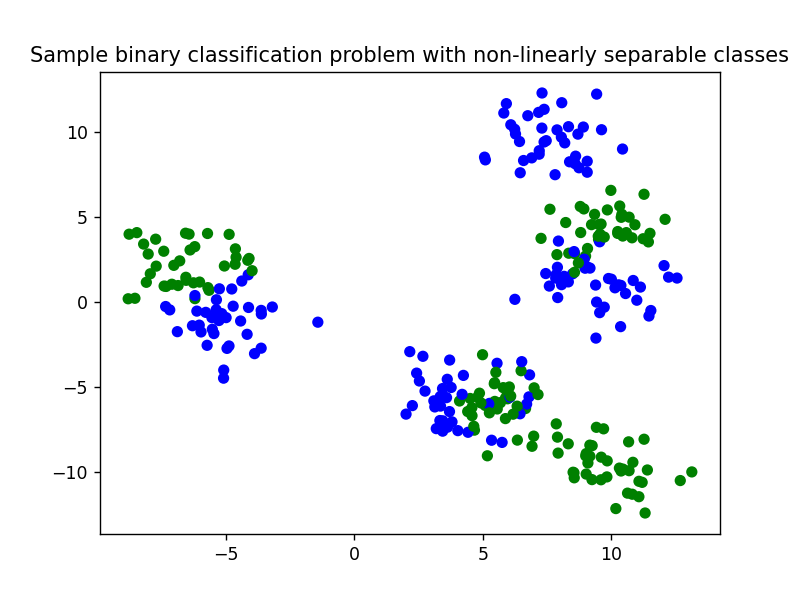

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,20)
scores_train = []
scores_test=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores_train.append(knn.score(X_train_scaled, y_train))
    scores_test.append(knn.score(X_test_scaled, y_test))



k_best = k_range[scores_test.index(max(scores_test))] # 'compute the best k'
score_best = max(scores_test) #'compute the best score'
print()
print ('The best k = {} , score = {}'.format(k_best,score_best ))


The best k = 18 , score = 0.9466666666666667


Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


<IPython.core.display.Javascript object>


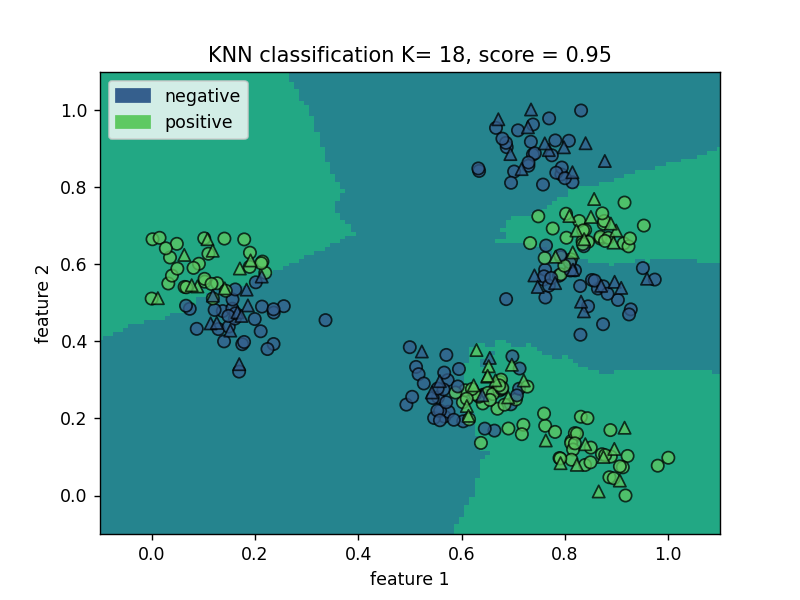

In [17]:
import ML_mst as mst
clf = KNeighborsClassifier(n_neighbors = k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score (X_test_scaled, y_test)
mst.plot_decision_boundary(clf, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score), 
                               precision=0.01,plot_symbol_size = 50)